In [8]:
import proofs
import dicts
import os
import statistics

In [24]:
# to use with a fold
# create dictinary counting the number of proofs per number of steps
def count_proofs_per_steps(path, acc):
    proof_json = dicts.load_json(path)
    steps = proofs.count_steps(proof_json)
    acc[steps] = acc.get(steps, 0) + 1
    return acc

# Split 'none'

In [5]:
path_gen = proofs.data_dir.generate_dataset_paths("../../../all_data/afp_data/2025_11_30", split="none")
frequency_map = proofs.data_dir.fold(path_gen, count_proofs_per_steps, start={})

222466it [1:03:18, 58.57it/s]  


In [31]:
frequency_df = pd.DataFrame(list(frequency_map.items()), columns=['Steps', 'Frequency']).sort_values('Steps')

In [9]:
all_counts = []
for steps, prf_count in frequency_map.items():
    all_counts.extend([steps] * prf_count)

if all_counts:
    avg_steps = statistics.mean(all_counts)
    med_steps = statistics.median(all_counts)
    mode_steps = statistics.mode(all_counts)
    
    print(f"Average: {avg_steps:.2f}")
    print(f"Median: {med_steps}")
    print(f"Mode: {mode_steps}")

Average: 11.24
Median: 2.0
Mode: 1


In [28]:
total_proofs = sum(frequency_map.values())

print("\nStep Count Percentages:")
for s in range(1,16):
    count = frequency_map.get(s, 0)
    percentage = (count / total_proofs) * 100 if total_proofs > 0 else 0
    print(f"{s} steps: {percentage:.2f}%")


Step Count Percentages:
1 steps: 36.30%
2 steps: 21.56%
3 steps: 6.81%
4 steps: 2.35%
5 steps: 1.62%
6 steps: 1.67%
7 steps: 1.56%
8 steps: 1.68%
9 steps: 1.36%
10 steps: 1.27%
11 steps: 1.44%
12 steps: 1.27%
13 steps: 1.26%
14 steps: 1.09%
15 steps: 0.90%


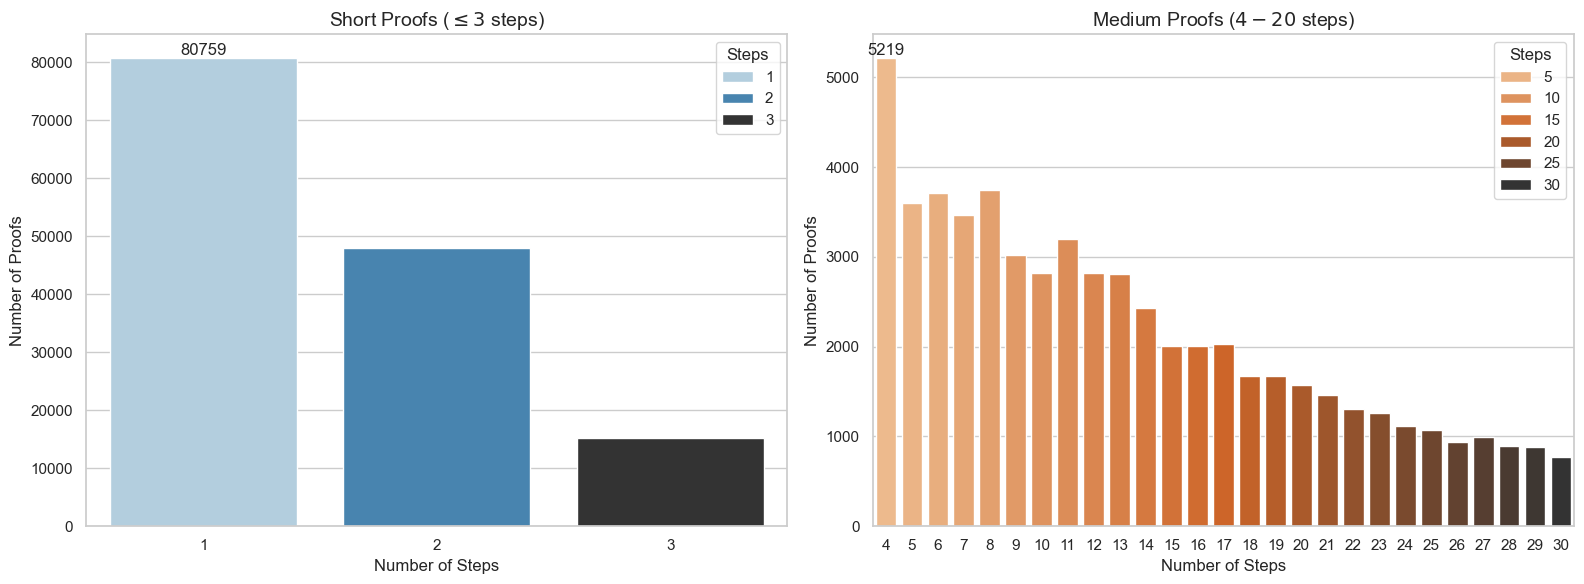

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_short = frequency_df[frequency_df['Steps'] <= 3]
df_mid = frequency_df[(frequency_df['Steps'] >= 4) & (frequency_df['Steps'] <= 30)]

# visual style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: 3 steps or less ---
sns.barplot(data=df_short, x='Steps', y='Frequency', ax=axes[0], hue='Steps', palette="Blues_d")
axes[0].set_title('Short Proofs ($\leq 3$ steps)', fontsize=14)
axes[0].set_xlabel('Number of Steps')
axes[0].set_ylabel('Number of Proofs')
axes[0].bar_label(axes[0].containers[0]) # Adds exact counts on top

# --- Plot 2: 4 to 20 steps ---
sns.barplot(data=df_mid, x='Steps', y='Frequency', ax=axes[1], hue='Steps', palette="Oranges_d")
axes[1].set_title('Medium Proofs ($4-20$ steps)', fontsize=14)
axes[1].set_xlabel('Number of Steps')
axes[1].set_ylabel('Number of Proofs')
axes[1].bar_label(axes[1].containers[0])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [18]:
df['Steps'].max()

np.int64(1388)

# Split 'test'

In [25]:
path_gen_test = proofs.data_dir.generate_dataset_paths("../../../all_data/afp_data/2025_11_30", split="test")
frequency_map_test = proofs.data_dir.fold(path_gen_test, count_proofs_per_steps, start={})

51158it [04:07, 206.74it/s] 


In [37]:
frequency_df_test = pd.DataFrame(list(frequency_map_test.items()), columns=['Steps', 'Frequency']).sort_values('Steps')

In [29]:
total_proofs_test = sum(frequency_map_test.values())

print("\nStep Count Percentages:")
for s in range(1,16):
    count = frequency_map_test.get(s, 0)
    percentage = (count / total_proofs_test) * 100 if total_proofs_test > 0 else 0
    print(f"{s} steps: {percentage:.2f}% out of {total_proofs_test}")


Step Count Percentages:
1 steps: 30.46% out of 51158
2 steps: 19.85% out of 51158
3 steps: 6.50% out of 51158
4 steps: 2.45% out of 51158
5 steps: 1.71% out of 51158
6 steps: 1.75% out of 51158
7 steps: 1.65% out of 51158
8 steps: 1.91% out of 51158
9 steps: 1.45% out of 51158
10 steps: 1.44% out of 51158
11 steps: 1.69% out of 51158
12 steps: 1.43% out of 51158
13 steps: 1.58% out of 51158
14 steps: 1.24% out of 51158
15 steps: 1.06% out of 51158


In [34]:
def plot_cumulative_percentages(df, cap=20, line=80):
    """
    Plots the cumulative percentage of proof steps up to a manual cap.
    
    :param freq_map: Dictionary of {step_count: frequency}
    :param cap: The maximum number of steps to include in the plot.
    """
    # calculate percentages
    total_proofs = df['Frequency'].sum()
    df['Percentage'] = (df['Frequency'] / total_proofs) * 100
    # calculate Cumulative Percentage
    df['Cumulative Percentage'] = df['Percentage'].cumsum()
    # filter to the manual cap (e.g., 20 steps)
    df_plot = df[df['Steps'] <= cap]
    # initialize the plot
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 7))
    # create the bar plot
    plot = sns.barplot(
        data=df_plot, 
        x='Steps', 
        y='Cumulative Percentage', 
        palette="viridis",
        hue='Steps',
        legend=False
    )

    # formatting and Labels
    plt.title(f'Cumulative Distribution of Proof Steps (Cap: {cap})', fontsize=16)
    plt.xlabel('Number of Steps', fontsize=12)
    plt.ylabel('Cumulative Percentage (%)', fontsize=12)
    
    # y-axis to strictly 0-100%
    # plt.ylim(0, 105) 
    
    # horizontal line to show "coverage" thresholds
    plt.axhline(line, ls='--', color='red', alpha=0.5, label=f"{line}% Threshold")

    # annotate bars with the percentage values
    for p in plot.patches:
        height = p.get_height()
        if height > 0:
            plot.annotate(f'{height:.1f}%', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 9), 
                          textcoords='offset points',
                          fontsize=9,
                          rotation=45)

    plt.tight_layout()
    # plt.savefig('cumulative_steps_plot.png')
    plt.show()

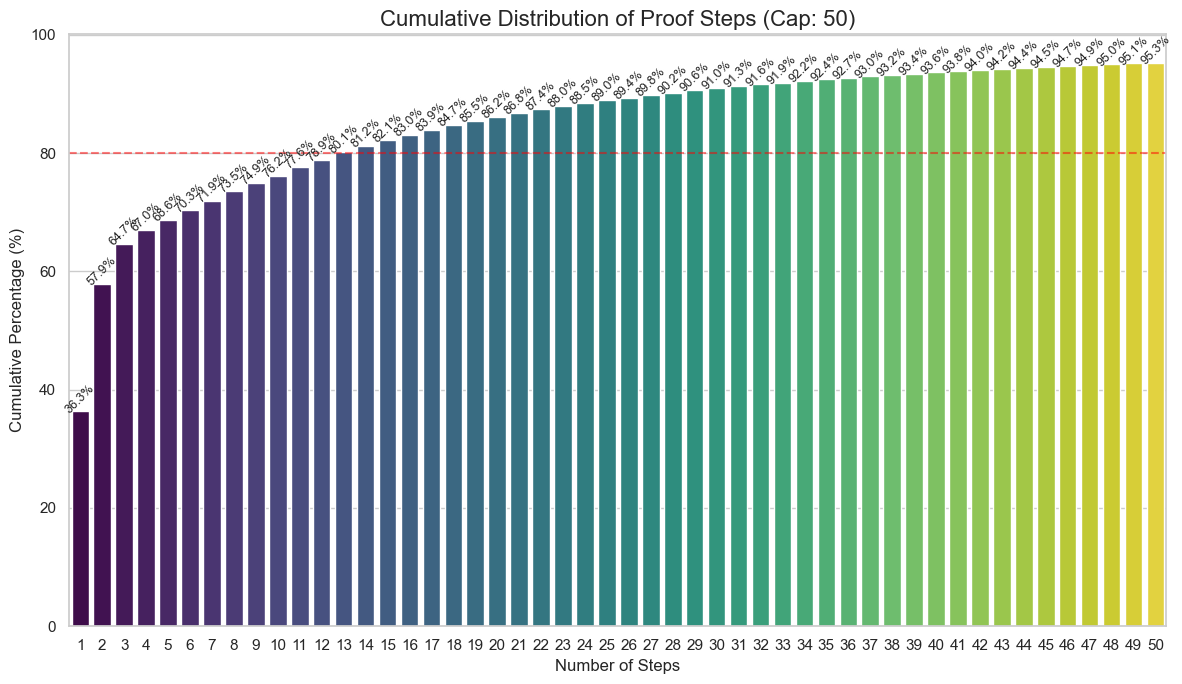

In [39]:
plot_cumulative_percentages(frequency_df, cap=50, line=80)

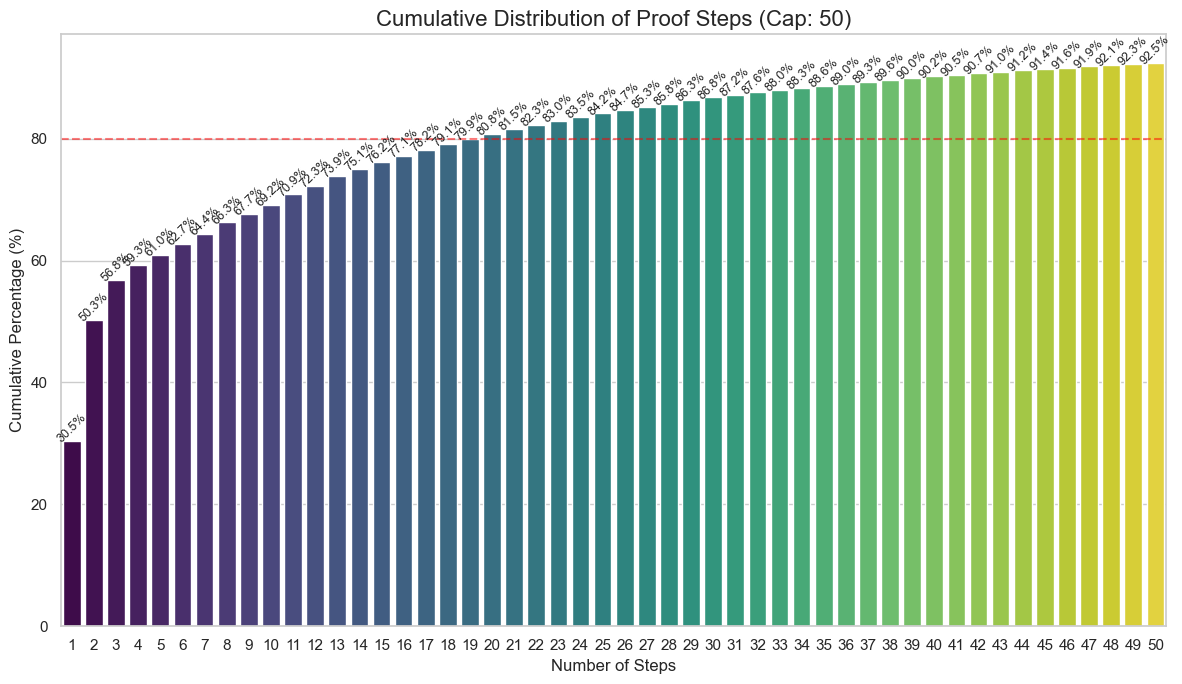

In [40]:
plot_cumulative_percentages(frequency_df_test, cap=50, line=80)